<a href="https://colab.research.google.com/github/Dahamey/Dahamey.github.io/blob/main/FeedForward_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler

import tensorflow as tf

In [2]:
df_raw = pd.read_csv("diabetes.csv")
df = df_raw.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df['Outcome'].value_counts(normalize = True) *100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [4]:
X = df.drop(['Outcome'], axis = 1)
y = df["Outcome"]

In [5]:
# Scaling the features ranges
scaler = StandardScaler()
X = scaler.fit_transform(X)

X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [6]:
X.shape, y.shape  # X is 2 dimentional, y is one dimentionalb

((768, 8), (768,))

In [7]:
# Stack the features (X) and target variable (y) horizontally, creating a 1-column array with automatic row determination.
data = np.hstack((X, np.reshape(y.values, (-1, 1))))

# Put it in a DataFrame
transformed_df = pd.DataFrame(data, columns=df.columns)

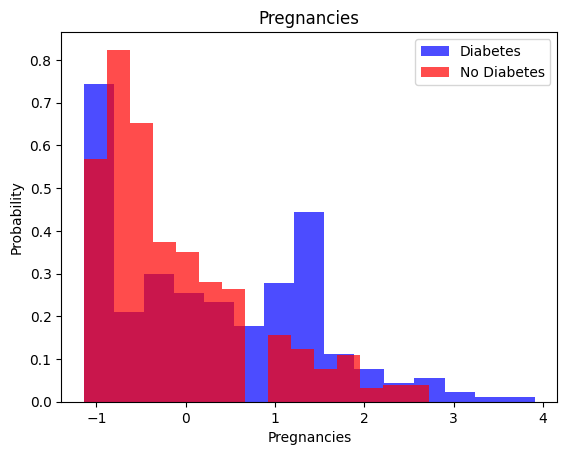

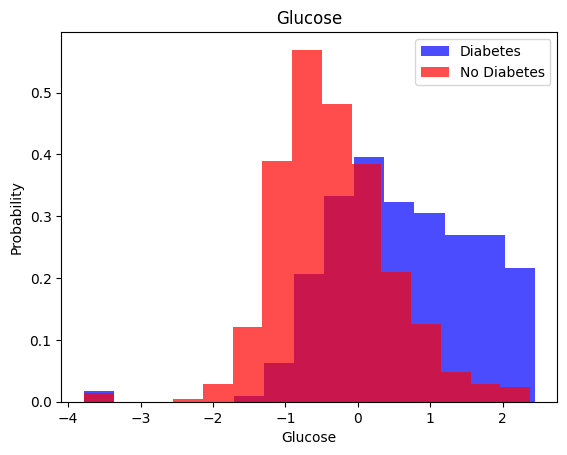

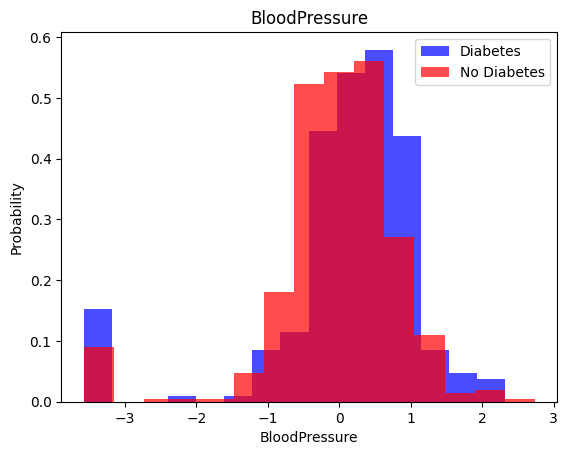

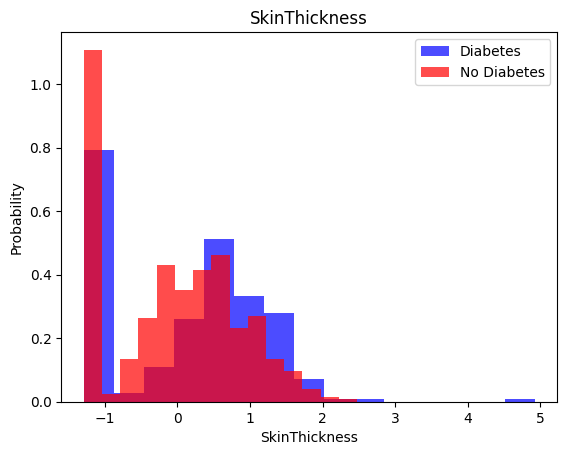

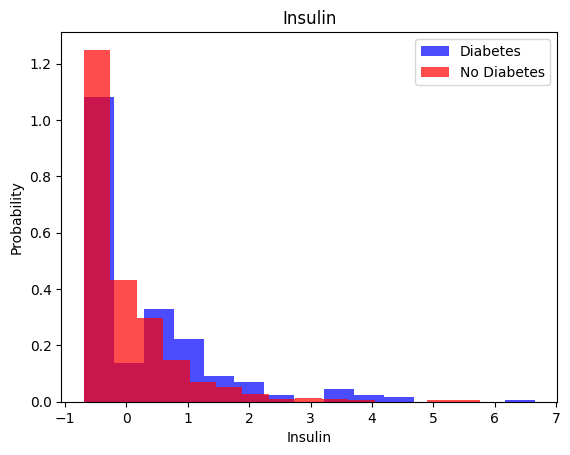

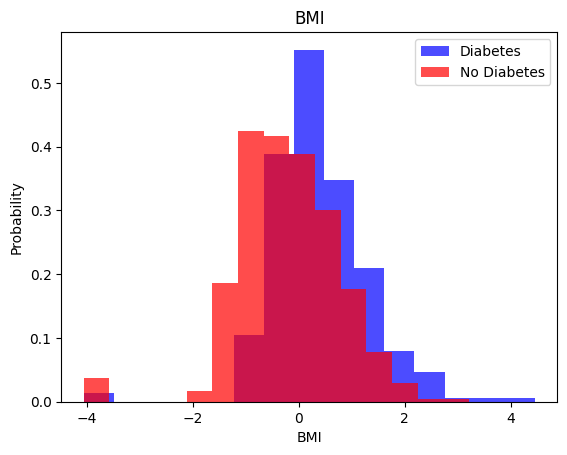

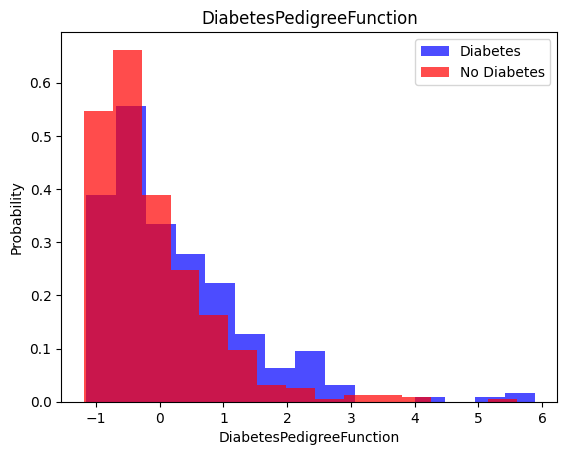

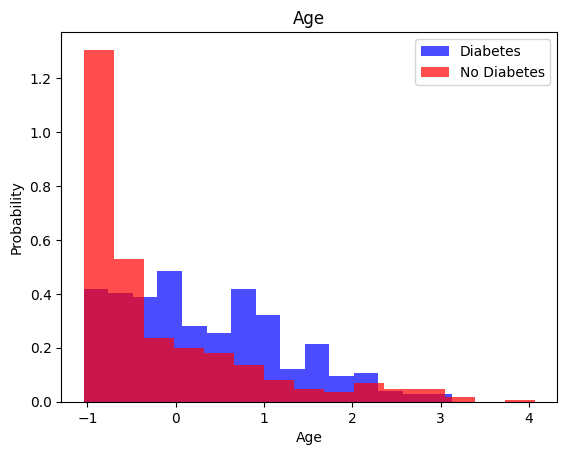

In [8]:
for i in range(len(df.columns[:-1])) :
  label = df.columns[i]
  #To normalize we use density = 1, the output is a proba between 0 and 1
  plt.hist(transformed_df[transformed_df["Outcome"] == 1][label], color ="b", label = "Diabetes", alpha = .7, density = True, bins = 15)
  plt.hist(transformed_df[transformed_df["Outcome"] == 0][label], color = "r", label = "No Diabetes", alpha = .7, density = True, bins = 15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [9]:
# Oversampling :
over = RandomOverSampler()
X,y = over.fit_resample(X,y)

In [10]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size = .2, random_state =42)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size = .2, random_state =42)

In [11]:
# Building the model :
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 16, activation = 'relu'),
    tf.keras.layers.Dense(units = 16, activation = 'relu'),
    tf.keras.layers.Dense(units = 1, activation = "sigmoid")
])

In [12]:
# Compile the model :
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ["accuracy"]) # This is a Binary Classification problem

In [13]:
model.evaluate(X_train,  y_train)

20/20 [==============================] - 2s 5ms/step - loss: 0.7692 - accuracy: 0.5328


[0.7692217230796814, 0.5328124761581421]

In [14]:
model.evaluate(X_valid, y_valid)

5/5 [==============================] - 0s 5ms/step - loss: 0.7720 - accuracy: 0.5312


[0.7719501256942749, 0.53125]

In [15]:
# Training the model :
model.fit(X_train, y_train, batch_size = 16, epochs= 20, validation_data = (X_valid, y_valid))

Epoch 1/20
40/40 [==============================] - 5s 23ms/step - loss: 0.7313 - accuracy: 0.5516 - val_loss: 0.6803 - val_accuracy: 0.5938
Epoch 2/20
40/40 [==============================] - 0s 8ms/step - loss: 0.6647 - accuracy: 0.6172 - val_loss: 0.6239 - val_accuracy: 0.6313
Epoch 3/20
40/40 [==============================] - 0s 7ms/step - loss: 0.6200 - accuracy: 0.6594 - val_loss: 0.5828 - val_accuracy: 0.6687
Epoch 4/20
40/40 [==============================] - 0s 6ms/step - loss: 0.5860 - accuracy: 0.6844 - val_loss: 0.5498 - val_accuracy: 0.6812
Epoch 5/20
40/40 [==============================] - 0s 8ms/step - loss: 0.5608 - accuracy: 0.7078 - val_loss: 0.5221 - val_accuracy: 0.7000
Epoch 6/20
40/40 [==============================] - 0s 8ms/step - loss: 0.5435 - accuracy: 0.7234 - val_loss: 0.5058 - val_accuracy: 0.7188
Epoch 7/20
40/40 [==============================] - 0s 8ms/step - loss: 0.5301 - accuracy: 0.7328 - val_loss: 0.4891 - val_accuracy: 0.7437
Epoch 8/20
40/40 [=

In [16]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.4908 - accuracy: 0.7750


[0.4908369779586792, 0.7749999761581421]